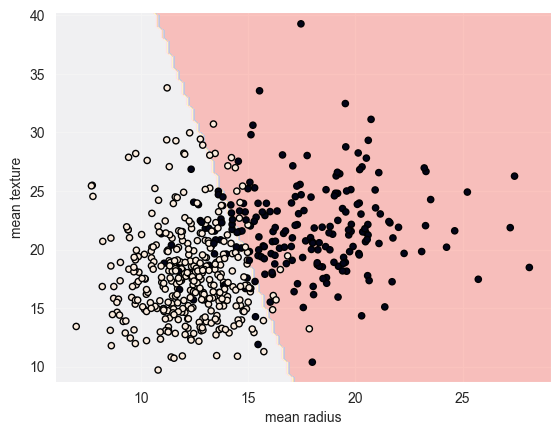

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

In [6]:
# linear svs from scratch


import numpy as np

class LinearSVM:
    def __init__(self,learning_rate=1e-3,C=1.0,n_iters=1000):
        self.learning_rate = learning_rate
        self.C = C
        self.n_iters = n_iters

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0.0

        for it in range(self.n_iters):
            # Stochastic / minibatch style (here full-batch for clarity)
            # Compute margins: y * (w.x + b)
            margins=y*(X.dot(self.w)+self.b)
            # Hinge loss gradient
            mask=margins<1
            # gradient w.r.t w: w - C * sum(y_i * x_i for violations)
            grad_w=self.w-self.C * np.dot(X[mask].T,y[mask])
            # gradient w.r.t b: -C * sum(y_i for violations)
            grad_b = - self.C * np.sum(y[mask])

            #gradient descent step
            self.w-=self.learning_rate*grad_w
            self.b-=self.learning_rate*grad_b
        return self

    def decision_function(self, X):
        return X.dot(self.w) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))

original predictions: [ 1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.
  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.
  1. -1.]
Training accuracy: 1.0


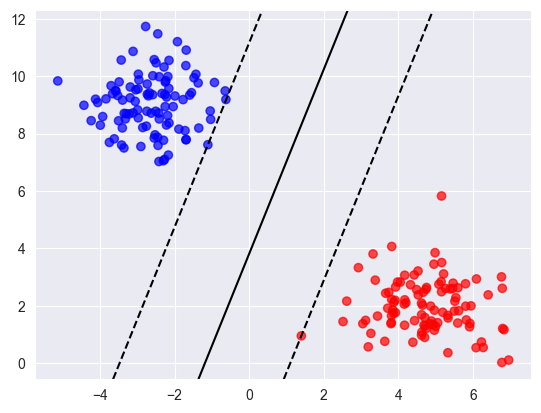

In [16]:
if __name__=="__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    X,y=make_blobs(n_samples=200,centers=2,random_state=42)
    y=np.where(y==0,-1,1)  # convertt -1,+1

    model=LinearSVM(learning_rate=0.001, C=1.0, n_iters=2000)
    model.fit(X,y)
    preds=model.predict(X)
    print("original predictions:",preds)
    print("Training accuracy:", (preds == y).mean())

    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.7)
    # plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    grid = np.c_[XX.ravel(), YY.ravel()]
    Z = model.decision_function(grid).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--','-','--'], colors='k')
    plt.show()

In [17]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load example data
X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=42)
# For sklearn SVM labels can be 0/1, no need for -1/+1 conversion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling is often important for SVMs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# linear SVM
clf_lin = SVC(kernel='linear', C=1.0)
clf_lin.fit(X_train, y_train)
y_pred = clf_lin.predict(X_test)
print("Linear SVM accuracy:", accuracy_score(y_test, y_pred))

# RBF kernel SVM
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma can be 'scale' or float
clf_rbf.fit(X_train, y_train)
print("RBF SVM accuracy:", accuracy_score(y_test, clf_rbf.predict(X_test)))

# Access support vectors and coefficients
print("Number of support vectors for linear SVM:", clf_lin.support_vectors_.shape[0])
print("Dual coefficients:", clf_lin.dual_coef_)  # shape (#classes-1, n_SV)


Linear SVM accuracy: 1.0
RBF SVM accuracy: 1.0
Number of support vectors for linear SVM: 2
Dual coefficients: [[-1.  1.]]


In [18]:
from sklearn.svm import SVR
import numpy as np

# create noisy sinusoidal data
rng = np.random.RandomState(0)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * rng.randn(200)

# scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_rbf.fit(Xs, y)
y_pred = svr_rbf.predict(Xs)

from sklearn.metrics import mean_squared_error
print("SVR MSE:", mean_squared_error(y, y_pred))


SVR MSE: 0.00905459934397031
